In [51]:
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
%matplotlib inline

In [56]:

#import and view results from simuilation
cluster_results=pd.read_csv('cluster_models/results.csv')
gradient_results=pd.read_csv('gradient_models/results.csv')
display_side_by_side(cluster_results.head(10),gradient_results.head(10))


,Rank,Overlap,Sequence_Depth,Method,Metric,value
0,2,0,100,Iterative SVD,KL-Div,2.498802
1,2,0,100,KNN,KL-Div,3.038482
2,2,0,100,OptSpace,KL-Div,1.563922
3,2,0,100,Pseudo Count,KL-Div,2.841434
4,2,0,100,Soft Impute,KL-Div,2.820043
5,2,0,1000,Iterative SVD,KL-Div,2.725254
6,2,0,1000,KNN,KL-Div,3.370590
7,2,0,1000,OptSpace,KL-Div,1.777084
8,2,0,1000,Pseudo Count,KL-Div,2.900865
9,2,0,1000,Soft Impute,KL-Div,2.894483


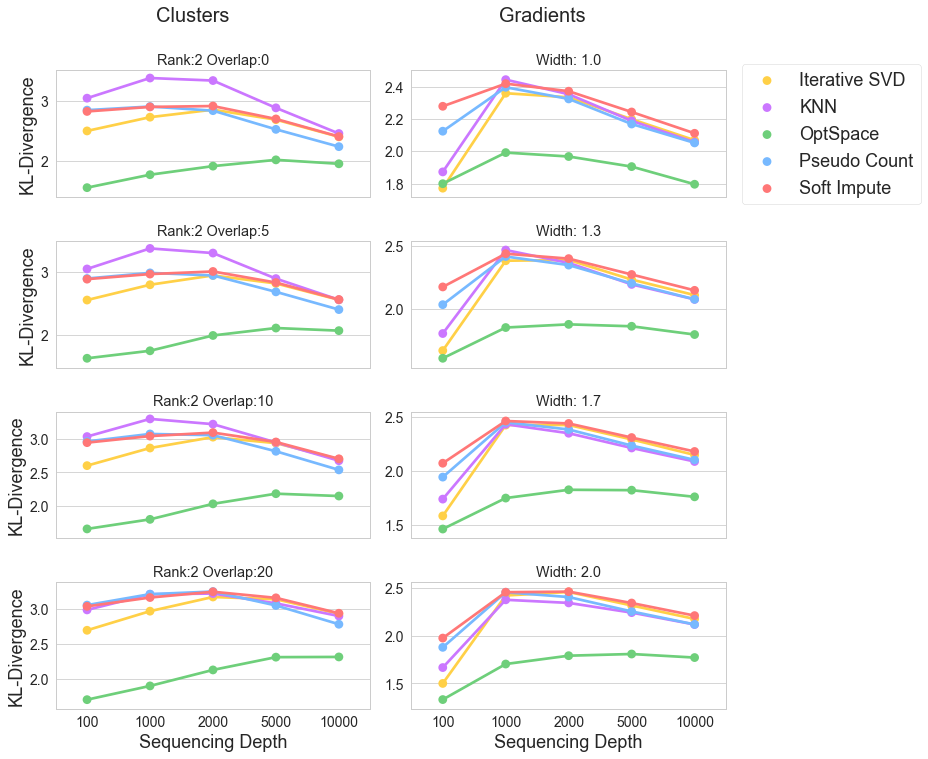

In [60]:
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.style.use('ggplot')
sns.set_style('whitegrid')

palette_map={'Soft Impute': '#FF7777',
                'KNN': '#CB77FF',
                'Pseudo Count': '#77B9FF',
                'OptSpace': '#6ECF7A',
                'Iterative SVD': '#FFD047'}


clusters={key_:df_ for key_,df_ in cluster_results.groupby(['Rank','Overlap'])}
gradients={key_:df_ for key_,df_ in gradient_results.groupby(['Band_Width'])}
all_clgr={**clusters,**gradients}

fig,axn = plt.subplots(4,2,figsize=(13,10),sharex=True,sharey=False)
flatax_=axn.flat

for (key_,df_),(use_) in zip(all_clgr.items(),[0,2,4,6,1,3,5,7]):
    
    ax_=flatax_[use_]
    if type(key_)==tuple:
        key_='Rank:'+' Overlap:'.join([str(x) for x in list(key_)])
    else:
        key_='Width: '+str(key_)
    df_['Sequence_Depth']=df_['Sequence_Depth'].astype(int)
    sns.pointplot(x='Sequence_Depth',y='value',hue='Method',data=df_,ax=ax_,palette=palette_map)
    if use_ not in [7,6]:
        ax_.set_xlabel('')
    else:
        ax_.set_xlabel('Sequencing Depth',fontsize=18)
    if use_%2!=0:
        ax_.set_ylabel('')
    else:
        ax_.set_ylabel('KL-Divergence',fontsize=18)
    if use_==1:
        ax_.legend(bbox_to_anchor=(1.05, 1.05), loc=2, borderaxespad=0.,prop={'size':18})
    else:
        ax_.legend_.remove()
    ax_.set_title(key_)
plt.suptitle('Clusters                                                 Gradients',fontsize=20,y=1.05,x=.40)
plt.tight_layout()   
fig.savefig('figures/figure3.png')
plt.show()
